In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance

# Changes output of the transformers to Pandas
from sklearn import set_config
set_config(transform_output="pandas")

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


#Anmerkung
#ChatGPT wurde insbesondere für das Finden von Fehlern im Code genutzt. Auch für das Finden der Hyperparamter wurde es nach passenden Werten gefragt.

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 1. General Information

Modul: Analytische Informationssysteme

Dozent: Prof. Dr. Roland Müller

Datensatz: Telco Customer Churn

Teilnehmer: Serif Gören

# 2. Business Understanding

## Business Problemstellung:

Das Ziel dieses Projekts ist es, das Kundenverhalten zu analysieren und die Faktoren zu identifizieren, warum Kunden abwandern. Mit geeigneten Modellen sollen Vorhersagen getroffen werden, um die Abwanderung zu reduzieren. Außerdem sollen geeignete Kundenbindungsprogramme entwickelt werden, um mit präventiven Maßnahmen die Abwanderung zu verhindern. Hauptfokus ist die "Churn"-Spalte, die angibt, ob Kunden in den letzten Monaten das Unternehmen verlassen haben oder nicht.


# 3. Data Understanding (Exploratory Data Analysis)

## 3.1 Beschreibung des Datensatzes:

Bei dem von IBM zur Verfügung gestellten Datensatz handelt es sich um ein fiktives Telekommunikationsunternehmen, die verschiedene Dienste (Telefon, Internet, Zusatzdienste, usw.) anbieten. Im Datensatz sind ebenfalls Kundeninformationen (Vertragsdauer, Zahlungsmethode, Vertragsart, usw.) und demografische Daten (Alter, Geschlecht, Familienstand) enthalten. Diese Daten sollen dem Modell helfen, vorhersagbare Muster für die Kundenabwanderung zu erkennen und werdem im Rahmen dieser Analyse eingehend untersucht.

In [3]:
# Überblick über Daten
# ersten 5 Zeilen des Datensatzes
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Dimension des Datensatzes
# Zeilen: 7043
# Spalten: 21 Features
df.shape

(7043, 21)

In [5]:
# Information über Datentypen
# Anzahl der nicht-null Werte
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Hier sieht man schon, dass "TotalCharges" ein object ist, welches später in float umgewandelt werden muss.

In [6]:
# Fehlende NaN Werte in jeder Spalte suchen
# True, wenn Wert NaN und Aufsummierung
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Man kann hier sehen, das keine fehlenden Werte gemäß dem hinterlegten Datentypen vorhanden sind.

In [7]:
# statistische Kennzahlen für numerische Daten
# count: Anzahl nicht-null Werte in Spalte
# mean: Durschnittswert 
# std: Standardabweichung, Streuung der Daten um Mittelwert
# min: kleinste Wert in Spalte
# max: größter Wert in Spalte
# 25%-Quartil: unter Wert liegen 25% der Daten
# 50%-Quartil/Median: unter Wert liegen 50% der Daten
# 75%-Quartil: unter Wert liegen 75% der Daten
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Hierdurch können wir einen ersten Eindruck gewinnen wie bestimmte numerische Werte verteilt sind. "SeniorCitizen" ist zwar als numerischer Wert hinterlegt, aber es ist tatsächlich nur in 2 Kategorien ("Yes" oder "No") aufgeteilt. Dies kann man sehr gut an den nicht vorhandenen Kennzahlen erkennen.

Beispielhafte Interpretation: 

- 16,21% sind ältere Bürger
- min bei tenure ist 0: neue Kunden
- Streuung von 30,09 bei MonthlyCharges bei Mittelwert von 64,76: relativ hoch, d.h. monatliche Gebühren der Kunden variieren sehr stark

In [8]:
# Anzahl der abgewanderten und gebliebenen Kunden
churn_counts = df["Churn"].value_counts() # zählt einzigartige Werte in Spalte

# Berechnung des Prozentsatzes
churn_percentage = df["Churn"].value_counts(normalize=True) * 100 # relative Häufigkeit

print(churn_counts)
print(churn_percentage)

Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


Eine Kundenabwanderung von 26,53% bietet ausreichend Daten zur Analyse und Modellierung. Das Ungleichgewicht sollte jedoch stets im Blick behalten werden, da es die Vorhersagegenauigkeit beeinflusst.

## 3.2 Datenvisualisierung

Um einen ersten Eindruck von den ganzen Merkmalen (Spalten) zu haben, wurden die 20 Merkmale (oder Features) visuell dargestellt. Außerdem wurde hierbei jedes Feature nochmal mit der Churn-Spalte dargestellt, um die Abwanderung direkt zu erkennen, was später für die Feature-Auswahl wichtig wird. "CustomerID" wurde weggelassen, da es keine Relevanz für die Analyse hat. Zur besseren Übersicht wurden die Features in 4 Kategorien eingeteilt.

Folgende Diagrammtypen wurden verwendet:

- Balkendiagramme: gut für kategoriale Daten; Unterschiede zwischen Kategorien sind leicht zu erkennen und zeigt Kundenabwanderung in jeder Kategorie
- Histogramme: gut für numerische Daten; Verteilung über Wertebereich
- Boxplots: Nützlich für Ausreißer und Verteilung in numerischen Daten
- Heatmaps: Korrelation zwischen verschiedenen numerischen Features


Zunächste einmal die Zielvariable "Churn" (Abwanderung):

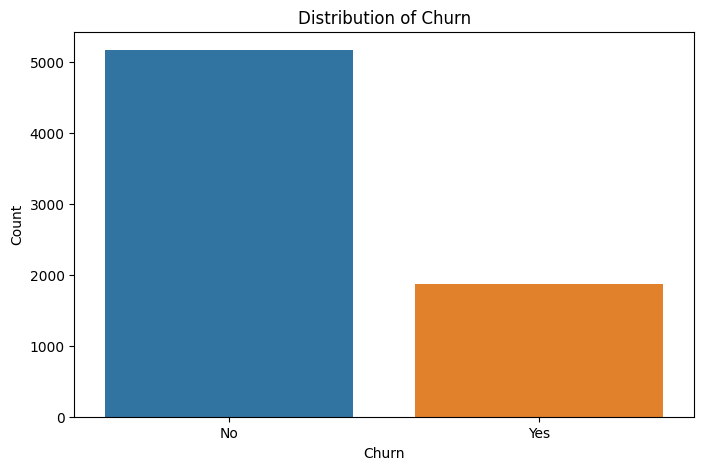

In [9]:
# Verteilung der Zielvariable "Kundenabwanderung" --> Yes,No
# Erster Überblick über die Abwanderung von Kunden
plt.figure(figsize=(8, 5)) 
sns.countplot(x="Churn", data=df)
plt.title("Distribution of Churn")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

## Kategorie 1: Demografische & Account Informationen

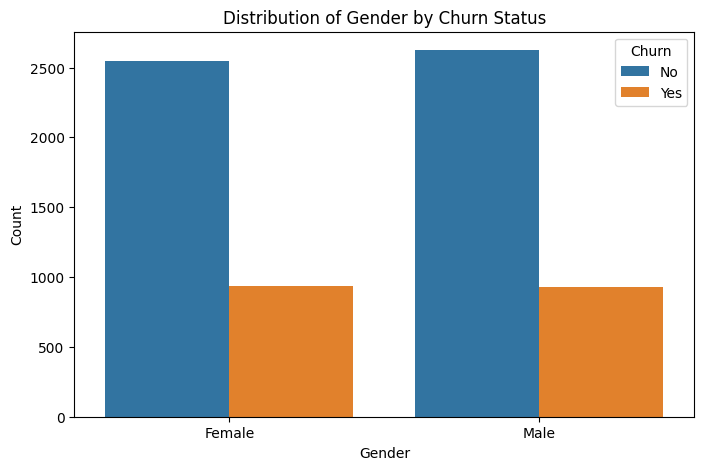

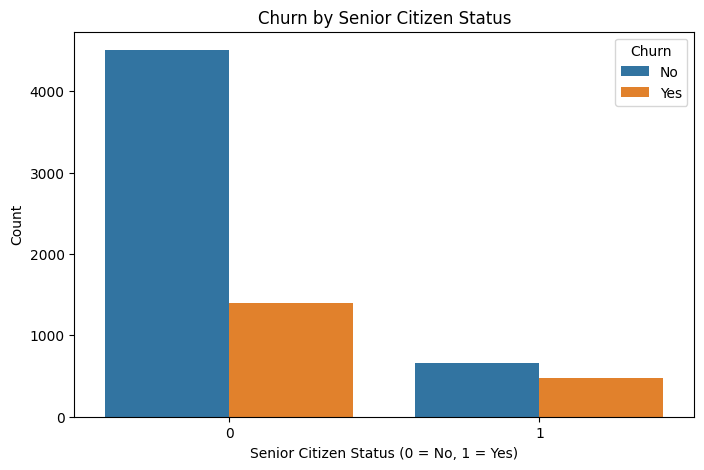

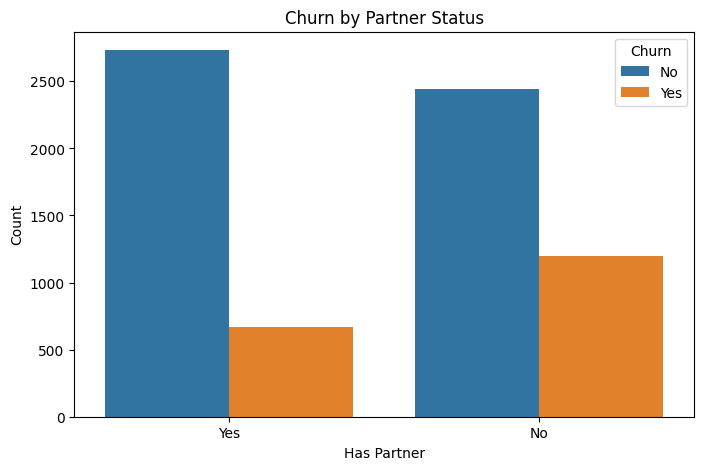

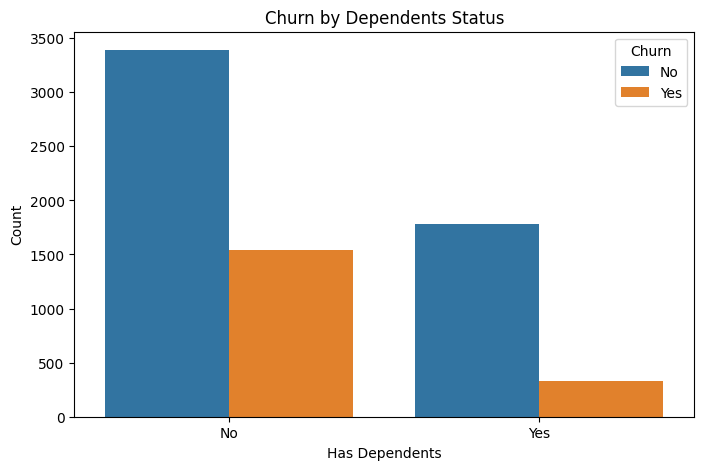

In [10]:
# Verteilung nach Geschlecht (bei Abwanderung) --> Male, Female
# Herausfinden von geschlechterspezifischen Trends 
plt.figure(figsize=(8, 5))
sns.countplot(x="gender", hue="Churn", data=df)
plt.title("Distribution of Gender by Churn Status")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Verteilung nach ältere Bürger in Abhängigkeit von Abwanderung
plt.figure(figsize=(8, 5))
sns.countplot(x="SeniorCitizen", hue="Churn", data=df)
plt.title("Churn by Senior Citizen Status")
plt.xlabel("Senior Citizen Status (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Verteilung nach Partner in Abhängigkeit von Abwanderung
plt.figure(figsize=(8, 5))
sns.countplot(x="Partner", hue="Churn", data=df)
plt.title("Churn by Partner Status")
plt.xlabel("Has Partner")
plt.ylabel("Count")
plt.show()

# Verteilung von Angehörigen in Abhängigkeit von Abwanderung
plt.figure(figsize=(8, 5))
sns.countplot(x="Dependents", hue="Churn", data=df)
plt.title("Churn by Dependents Status")
plt.xlabel("Has Dependents")
plt.ylabel("Count")
plt.show()

## Kategorie 2: Dienstleistungen

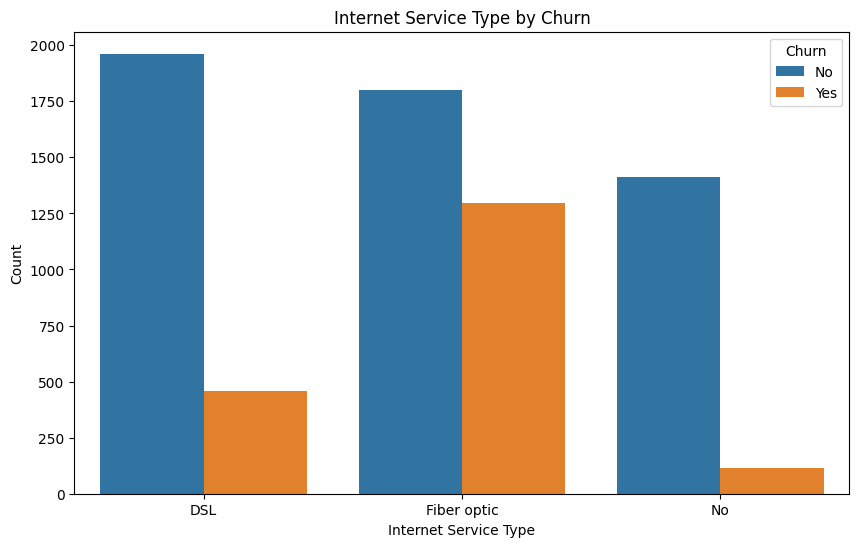

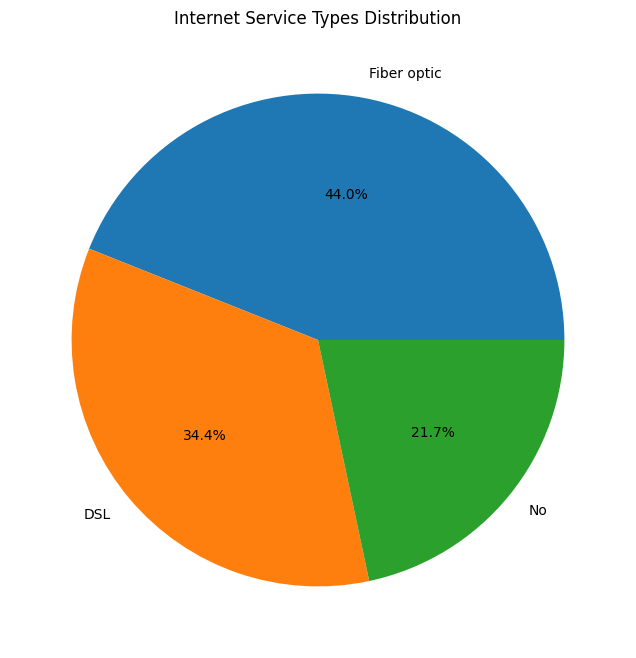

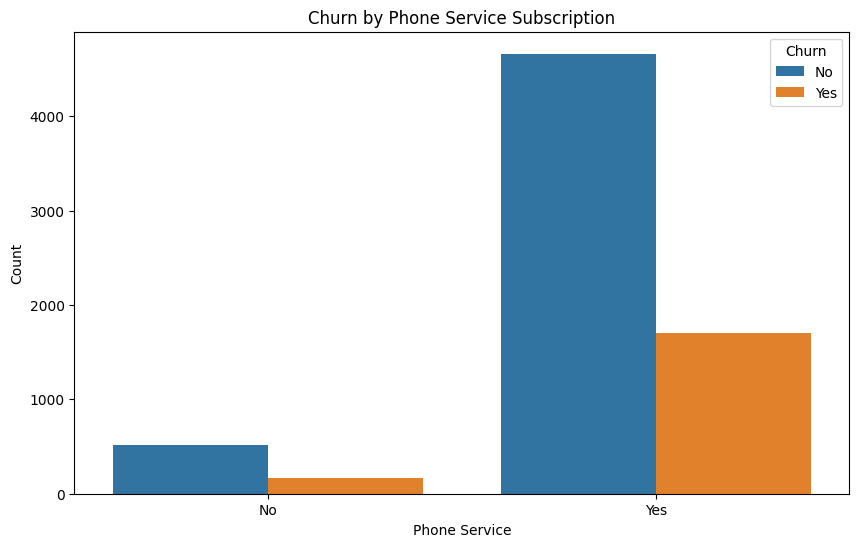

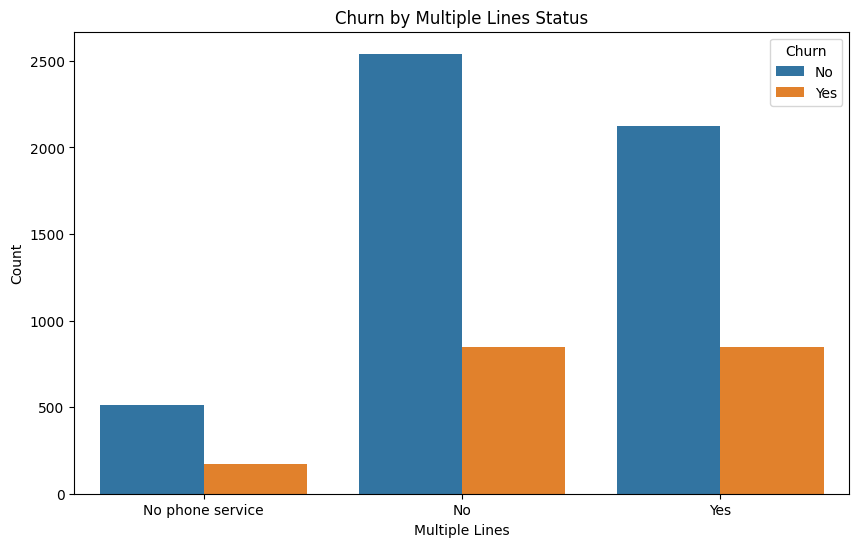

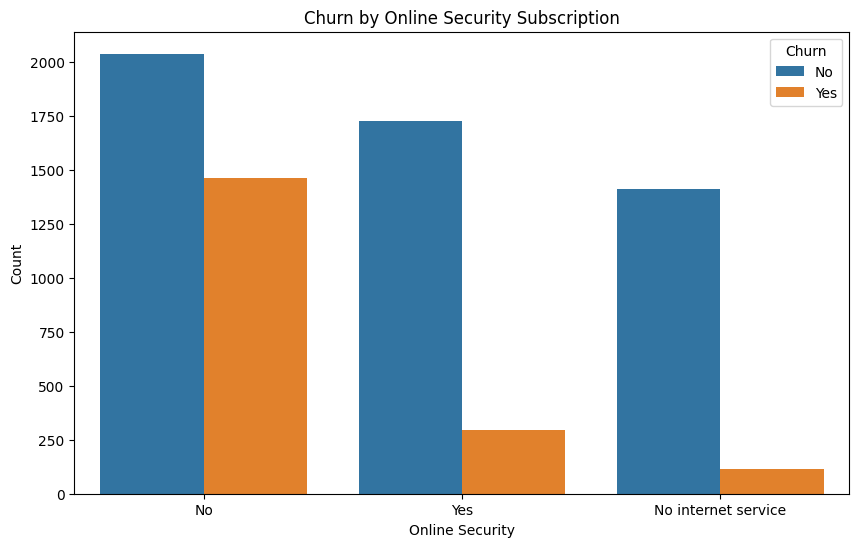

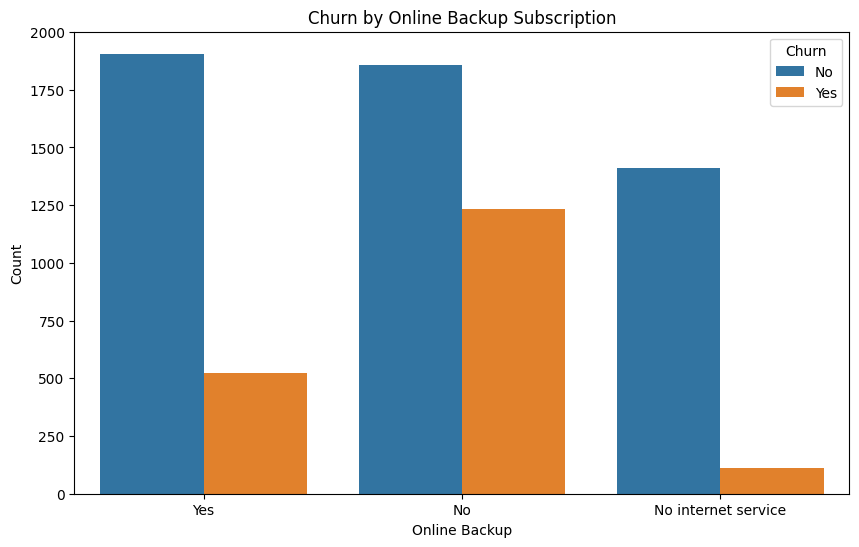

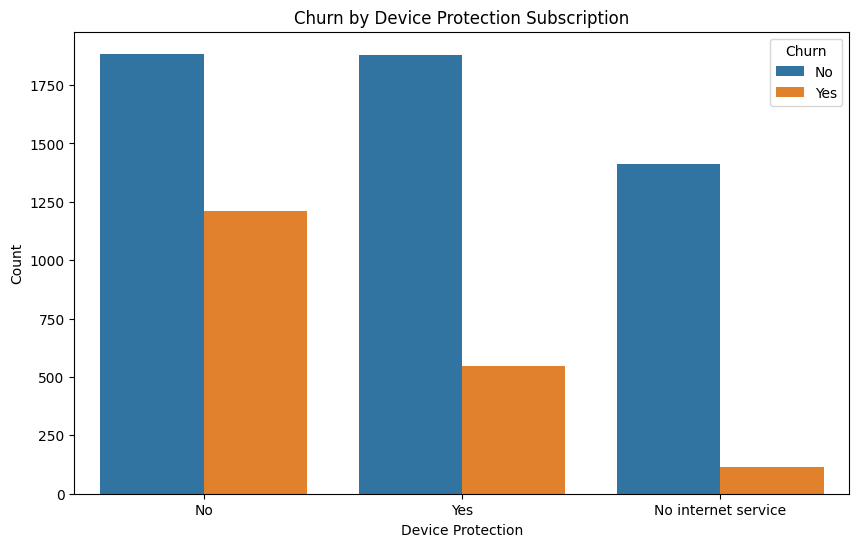

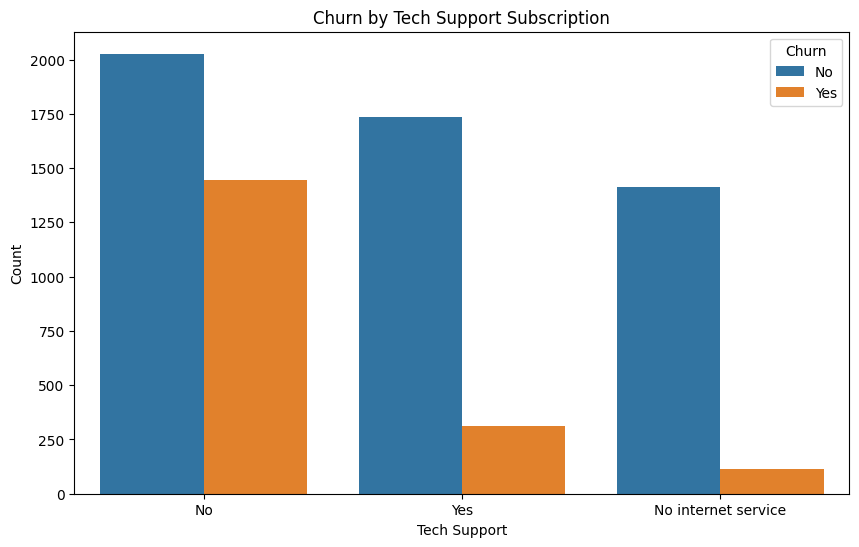

In [11]:
# Dienstleistungen in Beziehung zu Abwanderung
# Korrelation von Diensten mit Abwanderung
# Herausfinden, ob bestimmte Dienste verbessert werden müssen

#Internetservice
plt.figure(figsize=(10, 6))
sns.countplot(x="InternetService", hue="Churn", data=df)
plt.title("Internet Service Type by Churn")
plt.xlabel("Internet Service Type")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8, 8))
df['InternetService'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Internet Service Types Distribution")
plt.ylabel("")
plt.show()

#Telefonservice
plt.figure(figsize=(10, 6))
sns.countplot(x="PhoneService", hue="Churn", data=df)
plt.title("Churn by Phone Service Subscription")
plt.xlabel("Phone Service")
plt.ylabel("Count")
plt.show()

# mehrere Telefonleitungen 
plt.figure(figsize=(10, 6))
sns.countplot(x="MultipleLines", hue="Churn", data=df)
plt.title("Churn by Multiple Lines Status")
plt.xlabel("Multiple Lines")
plt.ylabel("Count")
plt.show()

# Online Sicherheit
plt.figure(figsize=(10, 6))
sns.countplot(x="OnlineSecurity", hue="Churn", data=df)
plt.title("Churn by Online Security Subscription")
plt.xlabel("Online Security")
plt.ylabel("Count")
plt.show()

# Online Backup
plt.figure(figsize=(10, 6))
sns.countplot(x="OnlineBackup", hue="Churn", data=df)
plt.title("Churn by Online Backup Subscription")
plt.xlabel("Online Backup")
plt.ylabel("Count")
plt.show()

#Geräteschutz
plt.figure(figsize=(10, 6))
sns.countplot(x="DeviceProtection", hue="Churn", data=df)
plt.title("Churn by Device Protection Subscription")
plt.xlabel("Device Protection")
plt.ylabel("Count")
plt.show()

# Technischer Support
plt.figure(figsize=(10, 6))
sns.countplot(x="TechSupport", hue="Churn", data=df)
plt.title("Churn by Tech Support Subscription")
plt.xlabel("Tech Support")
plt.ylabel("Count")
plt.show()

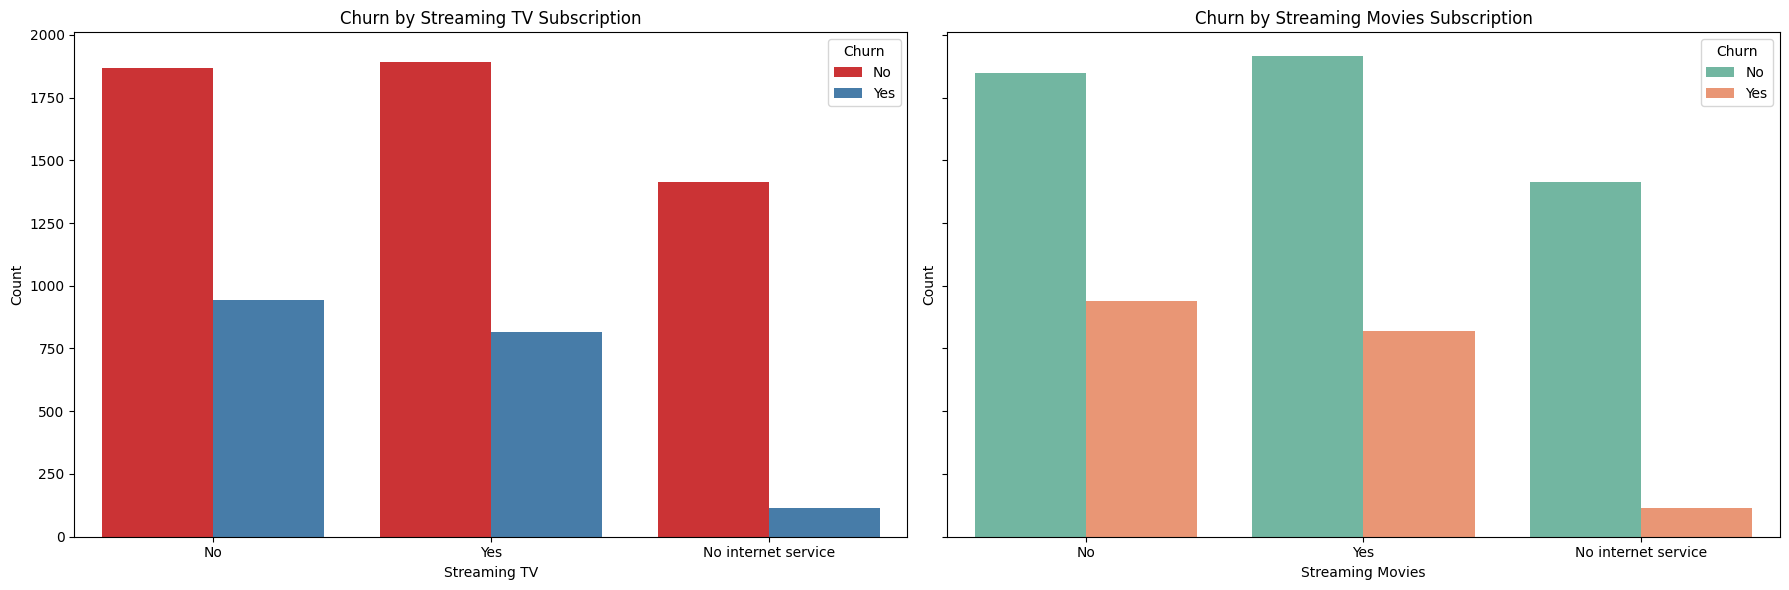

In [12]:
# Abonennment für Streaming TV und Streaming Film
data_streaming_tv = df[["Churn", "StreamingTV"]]
data_streaming_movies = df[["Churn", "StreamingMovies"]]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), sharey=True)

# StreamingTV
sns.countplot(ax=axes[0], x="StreamingTV", hue="Churn", data=data_streaming_tv, palette="Set1")
axes[0].set_title("Churn by Streaming TV Subscription")
axes[0].set_xlabel("Streaming TV")
axes[0].set_ylabel("Count")
axes[0].legend(title="Churn")

# StreamingMovies
sns.countplot(ax=axes[1], x="StreamingMovies", hue="Churn", data=data_streaming_movies, palette="Set2")
axes[1].set_title("Churn by Streaming Movies Subscription")
axes[1].set_xlabel("Streaming Movies")
axes[1].set_ylabel("Count")
axes[1].legend(title="Churn")

plt.tight_layout()
plt.show()

## Kategorie 3: Vertrag- und Zahlungsmethoden

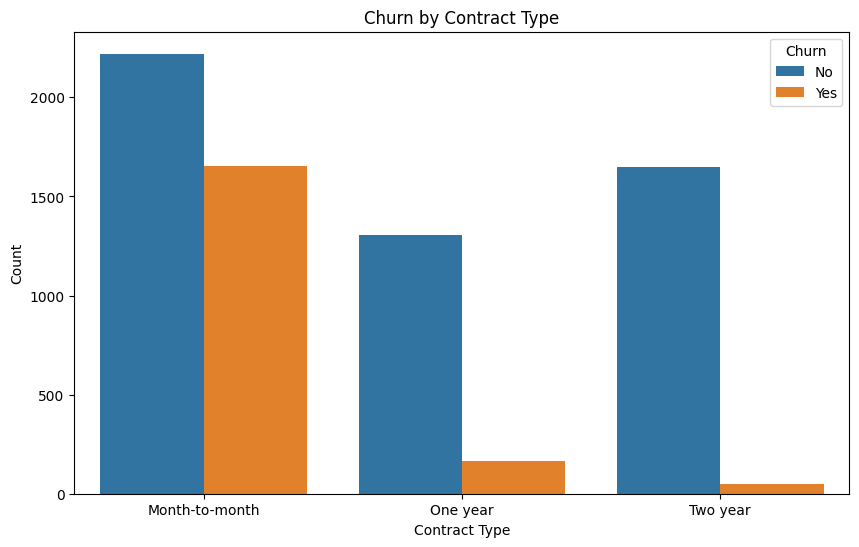

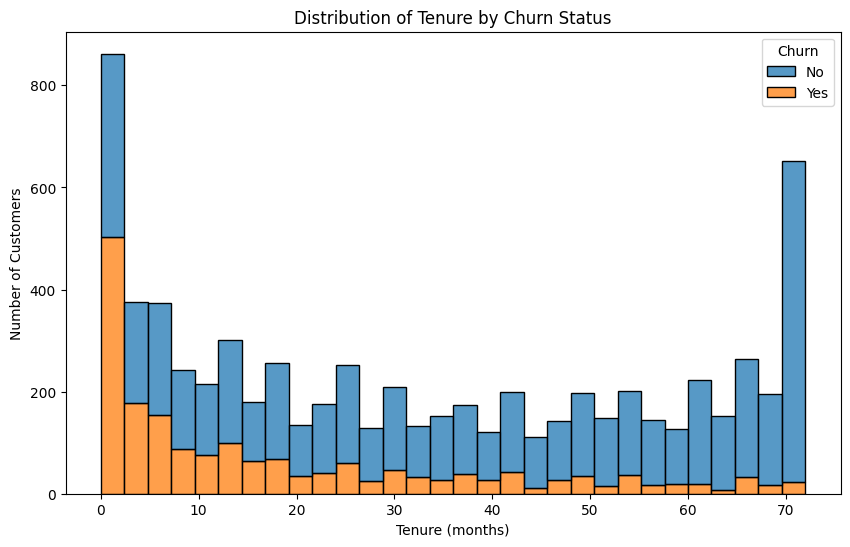

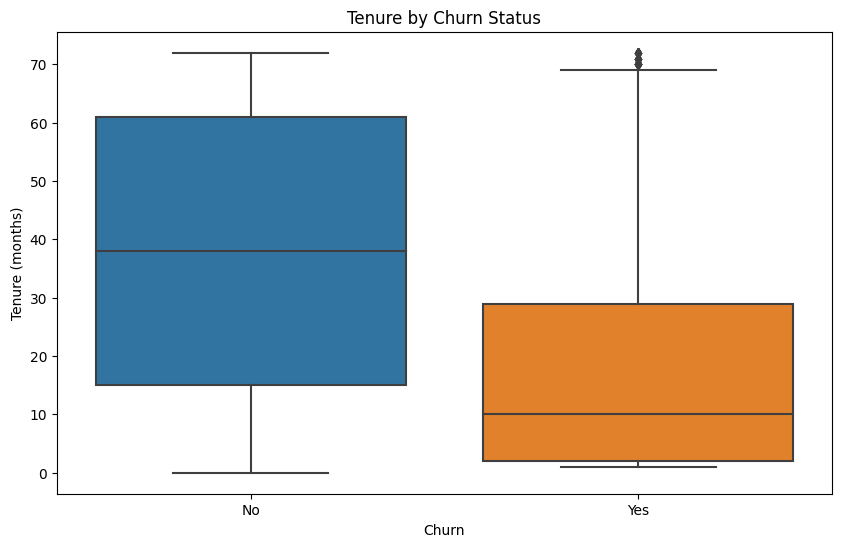

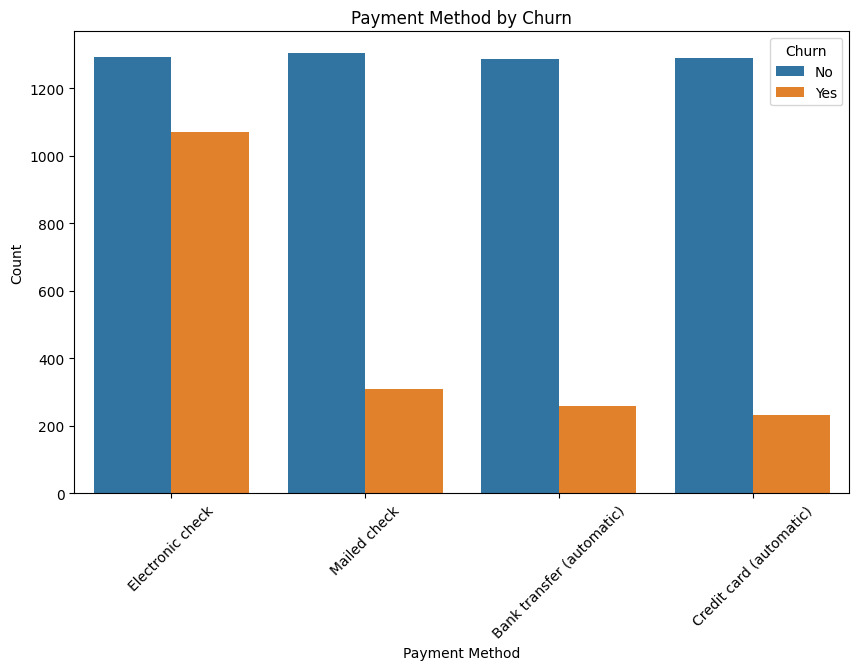

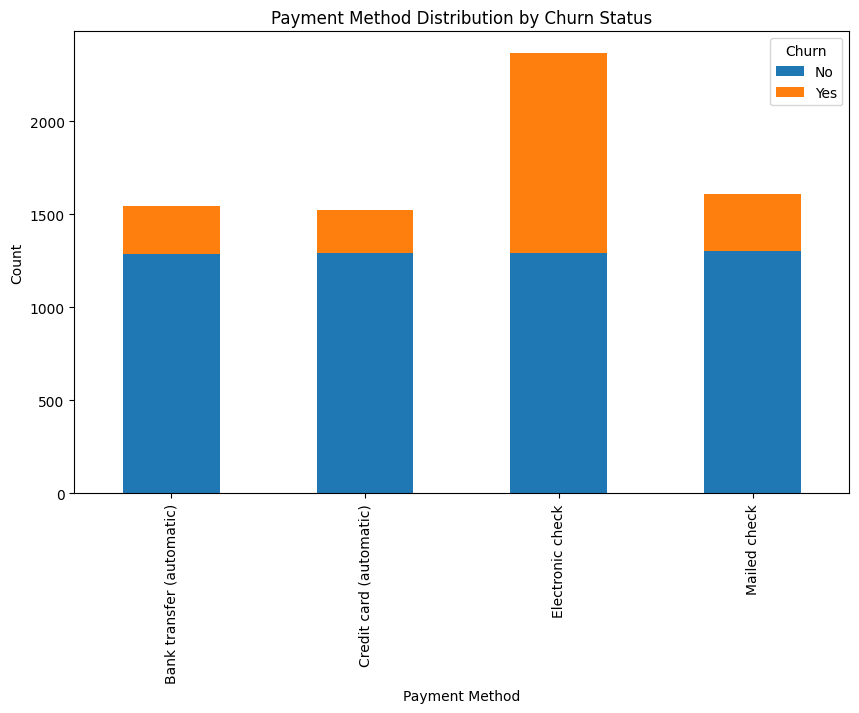

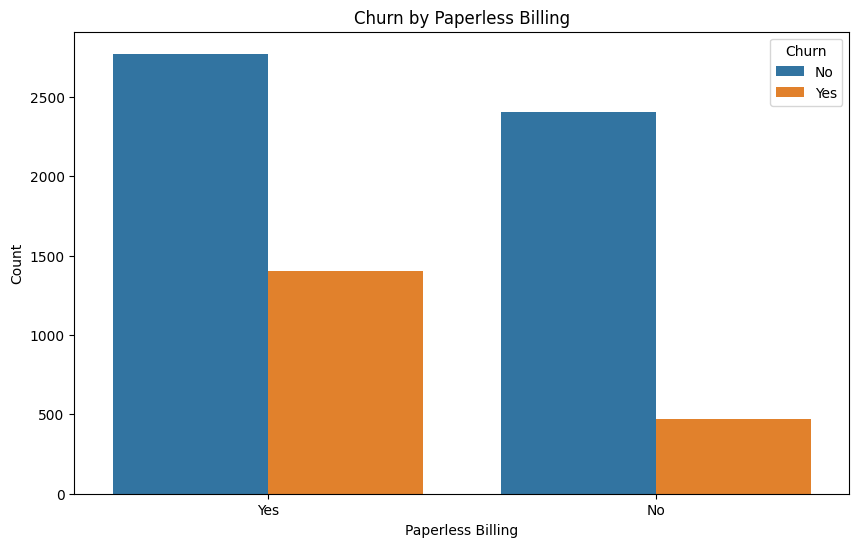

In [13]:
# Vertragslaufzeit --> monatlich, 1 jahr, 2 jahre 
plt.figure(figsize=(10, 6))
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()

# Verteilung der Vertragsdauer --> Monate numerisch; wie lange der Kunde beim Unternehmen ist
# Herausfinden, ob Längere Vertragsdauern mit weniger Abwanderung verbunden sind
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="tenure", hue="Churn", kde=False, bins=30, multiple="stack") # Histogramm
plt.title("Distribution of Tenure by Churn Status")
plt.xlabel("Tenure (months)")
plt.ylabel("Number of Customers")
plt.show()

# Vertragsdauer in Abhängigkeit zu Abwanderung als Boxplot
# Herausfinden, ob kürzere Vertragslaufzeiten zu höherer Abwanderung führt
# Für Visualisierung von Ausreißern und Verteilung
plt.figure(figsize=(10, 6))
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Tenure (months)")
plt.show()

# Zahlungsmethoden in Beziehung zu Abwanderung --> Electronic check, mailed check, bank transfer, credit card
# Einfluss der Zahlungspräferenz auf Abwanderung
# herausfinden, ob es Unzufriedenheit bei bestimmtenzahlungsmethoden gibt
plt.figure(figsize=(10, 6))
sns.countplot(x="PaymentMethod", hue="Churn", data=df)
plt.title("Payment Method by Churn")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

payment_churn = df.groupby(["PaymentMethod", "Churn"]).size().unstack().fillna(0)
payment_churn.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Payment Method Distribution by Churn Status")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()

# Papierlose Rechnungsstellung
plt.figure(figsize=(10, 6))
sns.countplot(x="PaperlessBilling", hue="Churn", data=df)
plt.title("Churn by Paperless Billing")
plt.xlabel("Paperless Billing")
plt.ylabel("Count")
plt.show()

Anmerkung: Bei "Tenure" Boxplot kann man schon erkennen, dass Kunden ab 30 Monaten nicht mehr dazu neigen abzuwandern.

## Kategorie 4: Finanzielle Aspekte

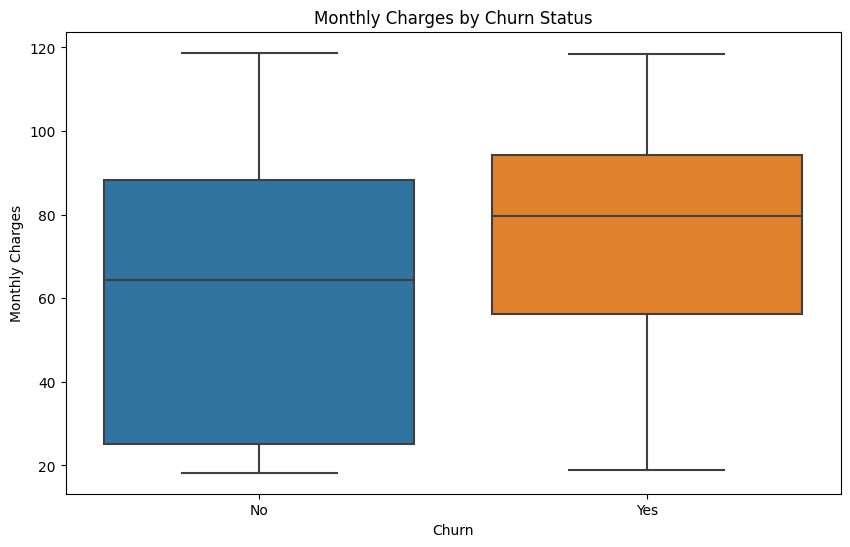

In [14]:
# Monatlichen Gebühren in Abhängigkeit zu Abwanderung als Boxplot --> Betrag numerisch
# Herausfinden, ob höhere monatliche Gebühren zu mehr Abwanderung führen
plt.figure(figsize=(10, 6))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()

Anmerkung: Auch hier sieht man, dass Kunden erst ab einer monatlichen Gebühr über 60 dazu neigen abzuwandern.

## 3.3 Analyse fehlender Daten

In [15]:
# Fehlerbehandlung von "TotalCharges"
print(df["TotalCharges"].dtype)
print(df["TotalCharges"].head())

object
0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object


"TotalCharges" hat den Datentyp object und muss zu einem numerischen Wert umgewandelt werden.

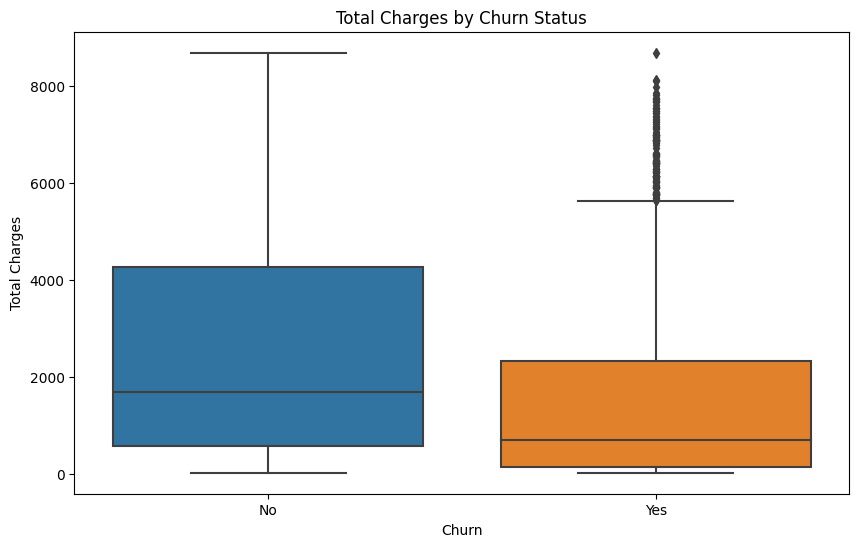

In [16]:
# Konvertiert Spalte "TotalCharges" in numerisches Format da es object war
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

# Gesamtkosten
plt.figure(figsize=(10, 6))
sns.boxplot(x="Churn", y="TotalCharges", data=df)
plt.title("Total Charges by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Total Charges")
plt.show()

Anmerkung: Auch bei diesem Boxplot erkennt man, dass die Abwanderung von Kunden sich bei Gesamtkosten zwischen 0 bis 2200 befindet. 

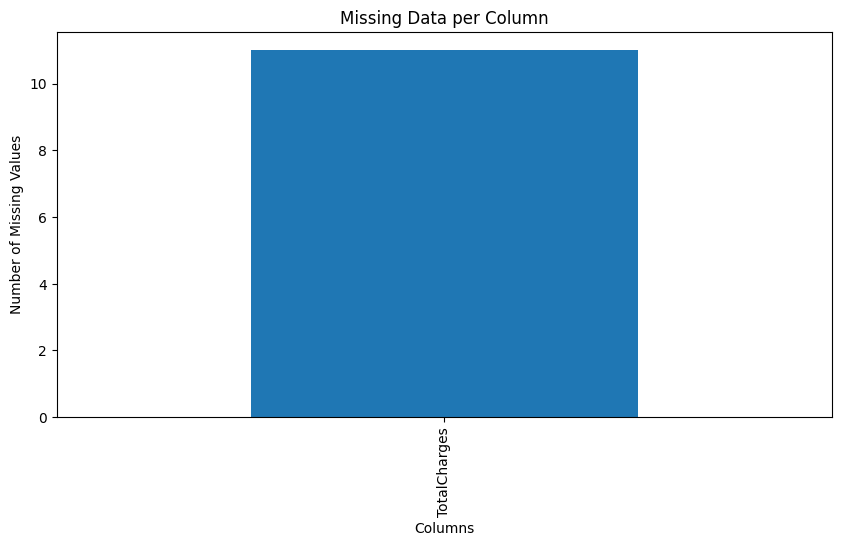

In [17]:
# Überprüfung auf fehlende Daten
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]

# Diagramm für fehlende Daten, wenn diese existieren
if not missing_data.empty:
    plt.figure(figsize=(10, 5))
    missing_data.plot(kind="bar")
    plt.title("Missing Data per Column")
    plt.xlabel("Columns")
    plt.ylabel("Number of Missing Values")
    plt.show()
else:
    print("No missing data to display.")

Es existieren 11 fehlenden Daten bei "TotalCharges". Hierbkei kann man nun entscheiden, ob man diese ersetzt mit dem Durchschnitt/Median oder die Zeilen komplett entfernt.

In [18]:
# Konvertiert "TotalCharges"-Spalte in numerische Werte
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Ersetzen fehlender Werte in "TotalCharges" durch Null, wenn "Tenure" gleich Null ist
# Kunde ist neu und hat möglicherweise noch keine Rechnung --> Wert ist Null, da noch keine Gebühren angefallen sind
condition = (df["TotalCharges"].isnull()) & (df["tenure"] == 0)
df.loc[condition, "TotalCharges"] = 0

# Berechnen des Medians für "TotalCharges" für die übrigen fehlenden Daten --> kann andere Gründe haben
# Median weniger anfällig als Durchschnitt
median_value = df["TotalCharges"].median()

# Ersetzen aller verbleibenden fehlenden Werte in "TotalCharges"
df["TotalCharges"].fillna(median_value, inplace=True)

# Überprüfung, ob noch fehlende Daten vorhanden sind
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# 4. Data Preparation

## 4.1 Kriterien zur Auswahl der Features:

- Features mit klarem Unterschied zwischen "Abgewandert" und "Nicht-Abgewandert" bei Balkendiagramm, Boxplot
- hohe Korrelation mit Zielvariablen "Abwanderung"
- Geschäftsverständnis (z.B. weniger Abwanderung durch längere Vertragsdauer; mehr Abwanderung durch bestimmte Bezahlmethoden da unbequem; Abwanderung durch höhere monatl. Kosten; seltenere Abwanderung von Kunden mit längere Verweildauer)

Laut dem Geschäftsverständnis könnten schon folgende relevant sein: Contract, PaymentMethod, MonthlyCharges, Tenure

Wie schon zuvor erwähnt kann CustomerID ignoriert werden. Die restlichen Features wurden mit Hilfe der Visualisierungen insbesondere auf einen hohen Unterschied bei Churn untersucht und folgendermaßen eingeordnet:

- Höhere Churn bei:

Partner: ohne Partner

Dependents: ohne Abhängige

InternetService: Glasfaser

OnlineService: kein Online Sicherheitsdienst

Contract: Monatsverträge

PaymentMethod: elektr.  Zahlungsmethode

OnlineBackup: kein OnlineBackup

DeviceProtection: kein Geräteschutz

TechSupport: kein techn. Support

PaperlessBilling: papierlose Rechnung

SeniorCitizen: ältere Personen 

Tenure: kürzere Vertragsdauer

MonthlyCharges: höhere monatliche. Kosten

TotalCharges: geringere Gesamtkosten


- Mittel:

MultipleLine: leicht höhere churn bei Kuden mit mehr Leitungen 


- Weniger relevant (trägt wenig zur Vorhersage des Modells bei, da ähnliche Verteilung):

Gender, PhoneService, StreamingTV, StreamingMovies

- nicht relevant:

customerID

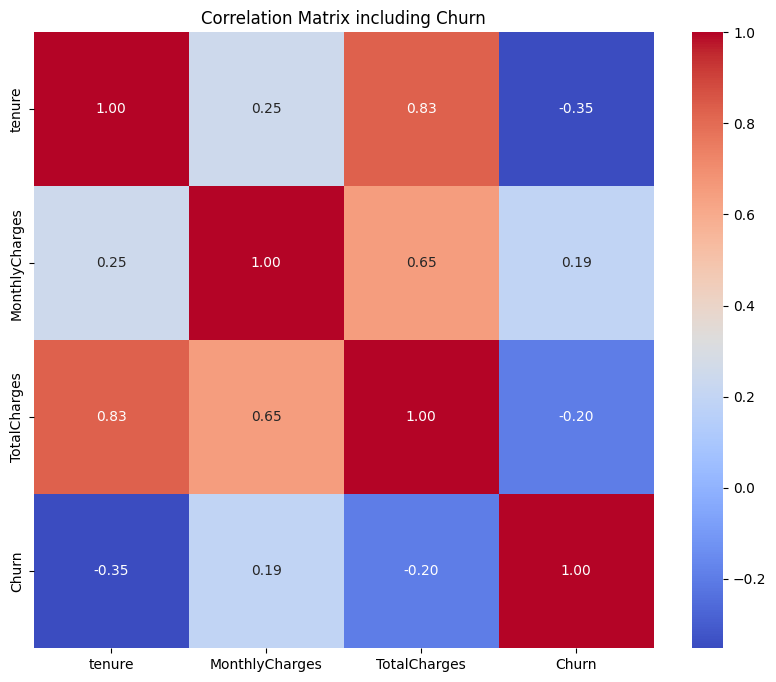

In [19]:
# Konvertiere "Churn" von kategorisch zu numerisch
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})

# Korrelationsmatrix für numerische Spalten
selected_columns = ["tenure", "MonthlyCharges", "TotalCharges", "Churn"]
correlation_matrix = df[selected_columns].corr()  # Korrelation für ausgewählte Spalten

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix including Churn")
plt.show()

Folgendes lässt sich aus der Heatmap ablesen:

- Anmerkung zu Bereichen: 

positive Werte (0 bis 1): Wenn ein Feature steigt, steigt auch das andere

negative Werte (-1 bis 0): Wenn ein Feature steigt, sinkt das andere

Bei 0: Keine Starke Korrelation

Korrelation zwischen Features:

- positive Korrelation zwischen tenure und TotalCharges: Kunden mit längerer Vertragsdauer tendenziell höhere Gesamtkosten
- schwache Korrelation zwischen tenure und MonthlyCharges: monatl. Kosten können unabhängig von Vertragsdauer veriieren
- moderate Korrelation zwischen MonthlyCharges und TotalCharges: höhere monatl. Kosten führen tendenziell zu höheren Gesamtkosten

Korrelation mit Churn:

- negative Korrelation mit Tenure: Kunden mit höherer Vertragsdauer wandern tendenziell weniger ab
- schwache positive Korrelation mit MonthlyCharges: Kunden mit höheren monatlichen Gebühren wandern tendenziell eher ab
- schwache negative Korrelation mit TotalCharges: Kunden mit höheren Gesamtkosten wandern tendenziell weniger ab

--> tenure, TotalCharges & MonthlyCharges relevant für weitere Analyse

Wegen der starker Korrelation hat man die Entscheidung zwischen tenure ODER TotalCharges, aber da hier "TotalCharges" nach dem Geschäftsverständnis relevant wirkt, soll es weiterhin für das Modell genutzt werden.

## 4.2 Entfernen von nicht benötigten Features

Aufgrund der gesammelten Erkenntnisse und Begründungen wurden folgende Features als nicht relevant für die Abwanderung betrachtet. Diese werden aus dem DataFrame entfernt.

In [20]:
# Entfernen der nicht benötigten Features aus dem DataFrame
features_to_drop = ["customerID", "gender", "PhoneService", "StreamingTV", "StreamingMovies"]
df = df.drop(columns=features_to_drop)

# Aktualisiertes DataFrame
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.50,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## 4.3 Hinzufügen neuer Features

Folgende neuen Features könnten relevant für die Vorhersage des Modells sein. Bei "TotalExtraServices" liegt die Vermutung nah, dass Kunden, die mehr extra Services abonniert haben eine stärkere Kundenbindung haben könnten, da diese zufriedener sind und somit weniger abwandern. Auch "CustomerEngagementScore" kann Aufschluss über die Kundenzufriedenheit geben, da ein positiver Score sowohl die Anzahl der Zusatzdienste als auch die Vertragsdauer berücksichtigt. "MultipleServices" hilft zwischen Kunden zu unterscheiden, die wenige bzw. viele Zusatzdiensten abonniert haben.

Alle drei neuen Features können vom Modell genutzt werden, um besser im Hinblick auf die Zielveriable zu entscheiden.

In [21]:
# Erstellung neuer Features und hinzufügen zum DataFrame

# TotalExtraServices (Anzahl der abonnierten Zusatzdienste)
# Zählt die Anzahl der abonnierten Zusatzdienste
# Grund: Kunden mit mehr Zusatzdiensten könnten eine geringere Abwanderungsrate haben, da evtl. stärkere Kundenbindungen
# astype(int) konvertiert boolische Werte in 1 und 0 um
df["TotalExtraServices"] = ((df["OnlineSecurity"] == "Yes").astype(int) +
                           (df["OnlineBackup"] == "Yes").astype(int) +
                           (df["DeviceProtection"] == "Yes").astype(int) +
                           (df["TechSupport"] == "Yes").astype(int))

# Kundenbindungs-Score
# Score kombiniert Anzahl abonnierten Zusatzdienste und Vertragsdauer
# Grund: Höherer Score kann auf eine stärkere Kundenbindung hinweisen, was relevant für die Vorhersage sein kann
df["CustomerEngagementScore"] = df["TotalExtraServices"] + (df["tenure"] / df["tenure"].max()) # normalisierte Vertragsdauer


# Mehrere Zusatzdienste (Binäres Feature)
# Gibt an, ob ein Kunde mehrere Zusatzdienste abonniert hat
# Grund: Kunden mit mehreren Zusatzdiensten könnten eine geringere Abwanderungsrate haben, da evtl. stärkere Kundenbindungen
df["MultipleServices"] = ((df["OnlineSecurity"] == "Yes") & (df["OnlineBackup"] == "Yes") & (df["DeviceProtection"] == "Yes") & (df["TechSupport"] == "Yes")).astype(int)

In [22]:
# Überprüfung der neuen Features
# Statistische Werte
print(df[["TotalExtraServices", "CustomerEngagementScore", "MultipleServices"]].describe())
print(df[["TotalExtraServices", "CustomerEngagementScore", "MultipleServices"]].isnull().sum())

# Churn als letzte Spalte setzen
churn_column = df.pop("Churn")
df["Churn"] = churn_column

# Aktuelles DataFrame
df.head()

       TotalExtraServices  CustomerEngagementScore  MultipleServices
count         7043.000000              7043.000000       7043.000000
mean             1.265654                 1.715253          0.066733
std              1.286879                 1.485755          0.249577
min              0.000000                 0.000000          0.000000
25%              0.000000                 0.333333          0.000000
50%              1.000000                 1.263889          0.000000
75%              2.000000                 2.791667          0.000000
max              4.000000                 5.000000          1.000000
TotalExtraServices         0
CustomerEngagementScore    0
MultipleServices           0
dtype: int64


,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,TotalExtraServices,CustomerEngagementScore,MultipleServices,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,1,1.013889,0,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.50,2,2.472222,0,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,2,2.027778,0,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,3,3.625000,0,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0.027778,0,1


In [23]:
# statistische Kennzahlen von allen numerischen Daten
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,TotalExtraServices,CustomerEngagementScore,MultipleServices,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,1.265654,1.715253,0.066733,0.265370
std,0.368612,24.559481,30.090047,2266.794470,1.286879,1.485755,0.249577,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000,0.333333,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,1.000000,1.263889,0.000000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,2.000000,2.791667,0.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,4.000000,5.000000,1.000000,1.000000


## 4.4 Erstellen der Pipelines

Die Features werden im nächsten Schritt in kategoriale und numerische Daten aufgeteilt. ColumnTransformer wird verwendet, um die verschiedenen Schritte zur Verarbeitung der Daten zu kombinieren. Fehlende numerischen Daten werden durch den Median ersetzt und Daten werden skaliert, kategoriale Daten werden für das Modell in binäre umgewandelt.

In [24]:
# Aufteilung kategorialen und numerischen Features
categorical_features = ["Partner", "Dependents", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "Contract", "PaperlessBilling", "PaymentMethod"]
numerical_features = ["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges", "TotalExtraServices", "CustomerEngagementScore", "MultipleServices"]


# SimpleImputer füllt fehlende Werte
imp = SimpleImputer(strategy="median")

# StandardScaler skaliert numerische Daten, damit vergleichbarer Maßstab
scaler = StandardScaler()

# OneHotEncoder wandelt kategoriale Daten in binäre um
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# ColumnTransformer mit SimpleImputer,StandardScaler und OneHotEncoder
ct = ColumnTransformer([("num", Pipeline([("imputer", imp), ("scaler", scaler)]), numerical_features),("cat", ohe, categorical_features)], remainder="passthrough")

## 4.5 Aufteilung der Daten in Trainings- und Testsets

In diesem Schritt werden die Daten in Trainings- und Testdaten aufgeteilt. Mit den Trainingsdaten wird das Modell trainiert, um Muster und Strukturen zu erkennen. Mit Hilfe der Testdaten kann das Modell evaluiert werden, um zu beurteilen wie gut das Modell ist. Die Aufteilung von 70/30 ist gängige Praxis.

In [25]:
# Definieren der Features (X) und des Ziels (y)
X = df.drop(columns=["Churn"])
y = df["Churn"]

# Aufteilen der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # random_state wichtig für Reproduzierbarkeit des Ergebnisses

# 5. Model Building

## 5.1 Wahl des Models:

### 1. Entscheidungsbaum (Decision Tree)

Ein Entscheidungsbaum ist ein Modell, das Vorhersagen basierend auf den Merkmalen der Daten erstellt. Ein Entscheidungsbaum besteht aus Knoten und Verzweigungen. Jeder Knoten stellt eine Frage/Bedingung dar bezogen auf ein bestimmtes Feature. Die Verzweigungen sind die möglichen Antworten, die wiederum zu weiteren Knoten führen. Die Blätter sind dann die Endpunkte, die die Entscheidung bzw. die Vorhersage/Klassifikation darstellen.

Das Decision Tree Modell ist leicht verständlich und benötigt im Vergleich zu anderen weniger Datenvorbereitung. Außerdem kann es sowohl numerische als auch kategoriale Daten verarbeiten. Es neigt jedoch dazu Trainingsdaten überanzupassen, was zu Overfitting führen kann. Auch kleinere Änderungen in den Daten können zu völlig unterschiedlichen Bäumen führen. Die Optimierung der Hyperparameter kann sich ebenfalls als sehr schwieirg erweisen.

Link: https://www.claimflow.de/post/was-ist-ein-decision-tree#:~:text=Einer%20der%20größten%20Vorteile%20ist,sind%20CART%2C%20ID3%20und%20C4.

## 5.2.1 Decision Tree erstellen & Pipelines definieren

Hier wird die Pipeline erstellt mit dem Preprocessor zur Vorverarbeitung der Daten (wie zuvor definiert) und dem Klassifikator (Entscheidungsbaum).

In [26]:
# Entscheidungsbaum-Modell definieren
decision_tree = DecisionTreeClassifier(random_state=42)

# Pipeline erstellen
pipe = Pipeline([("preprocessor", ct), ("classifier", decision_tree)])

## 5.2.2 Pipeline auf Trainingsdaten fitten

Der Entscheidungsbaum wird auf den Trainingsdaten trainiert.

In [27]:
# Pipeline auf den Trainingsdaten fitten
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges',
                                                   'TotalExtraServices',
                                                   'CustomerEngagementScore',
                                                   'MultipleServices']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Partner', 'Dependents',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

## 5.2.3 Hyperparameter-Tuning

"Params" enthält eine Sammlung von Hyperparametern, die zur Optimierung des Modells genutzt werden. Hier wird ein GridSearch verwendet, um die beste Kombination an Parameter für den Entscheidungsbaum zu finden und seine Leistung zu maximieren. Für die Kreuzvalidierung wurde 10 gewählt. Das heißt die Daten werden in 10 Teile aufgeteilt, wobei jedes Mal ein anderer Teil als Testdaten genutzt wird. Dies hilft vor allem, dass das Modell nicht nur auf den Trainingsdaten gut funktioniert.

In [28]:
# Hyperparameter
params = {
    'classifier__max_depth': [None, 10, 20, 30], # maximale Tiefe der Bäume: Begrenzung schützt vor Overfitting (kann sonst bei None so tief wachsen, um alle Knoten perfekt zu klassifizieren)
    'classifier__min_samples_split': [2, 10, 20], # minimale Anzahl von Samples, die erforderlich ist, um einen Knoten zu teilen (höhere kann Overfitting vermeiden)
    'classifier__min_samples_leaf': [1, 5, 10] # minimale Anzahl von Samples in einem Blattknoten (höherer Wert, bessere Generalisierung)
}

# GridSearchCV zur Hyperparameteroptimierung
grid_search = GridSearchCV(pipe, params, cv=10, scoring="accuracy", n_jobs=-1, verbose=1, return_train_score=True)
grid_search.fit(X_train, y_train)

# Beste Hyperparameter
print("Beste Hyperparameter gefunden durch GridSearchCV:")
print(grid_search.best_params_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
Beste Hyperparameter gefunden durch GridSearchCV:
{'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 20}


# 6 Model Evaluation (Decision Tree)

## 6.1 Evaluierung des besten Modells

Accuracy of the best model on the test data set:
0.7766209181258874
Classification report of initial model:
              precision    recall  f1-score   support

          No       0.83      0.88      0.85      1539
         Yes       0.61      0.50      0.55       574

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113



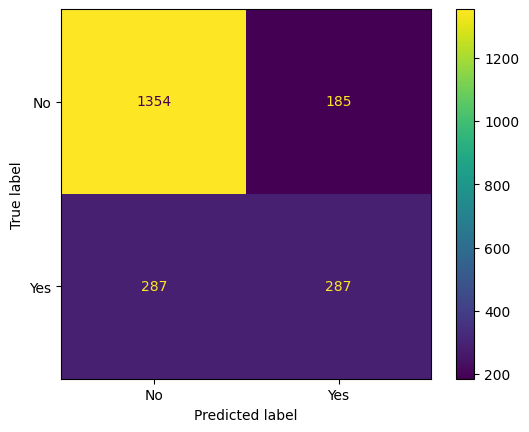

In [29]:
# Bestes Modell
best_model = grid_search.best_estimator_

# Vorhersagen auf dem Testdatensatz
y_pred = best_model.predict(X_test)

# Genauigkeit des besten Modells
print("Accuracy of the best model on the test data set:")
print(best_model.score(X_test, y_test))

# Klassifikationsbericht
print("Classification report of initial model:")
print(classification_report(y_test, y_pred, target_names=["No", "Yes"]))

# Konfusionsmatrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["No", "Yes"])

## 6.2 Feature Importance

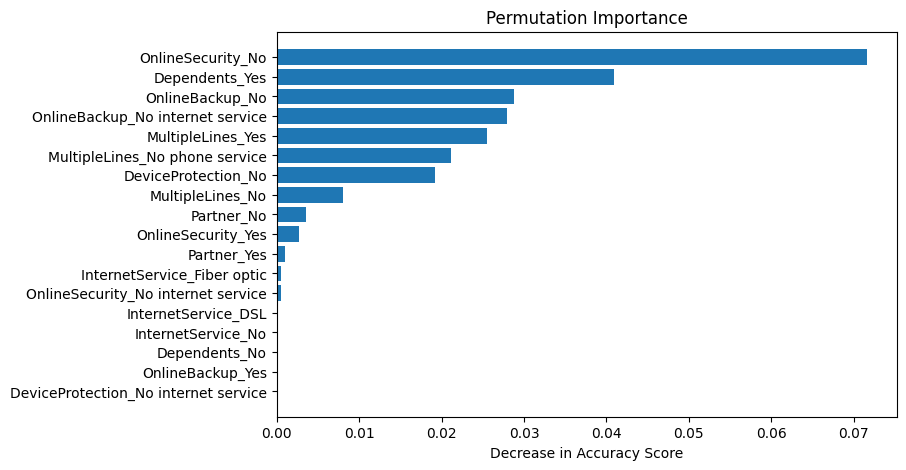

In [30]:
# Feature-Wichtigkeit
perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=5, random_state=42)
features_names = best_model.named_steps["preprocessor"].transformers_[1][1].get_feature_names_out()
importances = perm_importance["importances_mean"]
sorted_idx = importances.argsort()

plt.figure(figsize=(8, 5))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(features_names)[sorted_idx])
plt.xlabel("Decrease in Accuracy Score")
plt.title("Permutation Importance")
plt.show()

### Allgemein:

Allgemein zu Confusion Matrix:

- True Positives (TP): Richtig vorhergesagte Abwanderung

- True Negatives (TN): Richtig vorhergesagte Nicht-Abwanderung

- False Positives (FP): Falsch vorhergesagte Abwanderung

- False Negatives (FN): Falsch vorhergesagte Nicht-Abwanderung

Link: https://databasecamp.de/ki/konfusionsmatrix


Allgemein zu Klassifikationsbericht:

- Precision: TP / (TP + FP) --> Anteil richtig vorhergesagter positiver Fälle an allen positiv vorhergesagten Fällen

- Recall: TP / (TP + FN) --> Anteil richtig vorhergesagter positiver Fälle an allen tatsächlichen positiven Fällen

- F1-Score: harmonische Mittel von Precision & Recall

- Support: Anzahl der jeweiligen Klassifikation (Abwanderung und Nicht-Abwanderung)

### Betrachtung der Ergebnisse:

### Konfusionsmatrix

- True Negatives (No, No): 1354 richtig vorhergesagte Nicht-Abwanderung

- False Positives (No, Yes)): 185 falsch vorhergesagte Abwanderung

- False Negatives (Yes, No): 287 falsch vorhergesagte Nicht-Abwanderung

- True Positives (Yes, Yes): 287 richtig vorhergesagte Abwanderung

Das Modell ist also mit TN 1354 gut darin Kunden zu erkennen, die im Unternehmen bleiben und mit TP 287 Kunden zu erkennen, die abwandern. Ein Problem stellen die FN 287 dar, also Kunden, die abwandern, aber nicht erkannt werden. Dies ist sehr kritisch zu sehen. Außerdem führen die FP 185 zu unnötigen Kosten, da vermutet wird, dass Kunden abwandern, aber eigentlich als Kunde bleiben. 

### Klassifikationsbericht:

Das Modell hat eine Genauigkeit von 77,66% die Kundenabwanderung richtig vorherzusagen. Es ist ein akzeptables Ergebnis, lässt aber definitiv noch Möglichkeit für Verbesserungen. Bei der Precision konnte das Modell von allen vorhergesagten Nicht-Abwanderungen 83% (No) richtig vorhersagen. Es ist also gut darin Kunden zu erkennen, die im Unternehmen bleiben. Mit einem Recall von 50% (Yes) identifiziert das Modell gerade Mal nur die Hälfte der Abwanderungen. Dadurch werden möglicherweise viele Kundenabwanderungen gar nicht rechtzeitig erkannt. Auch die Precision von 61% (Yes) zeigt, dass das Modell zu 39% vorhersagt, dass Kunden abwandern, die eigentlich bleiben. Hierbei werden Ressourcen zur Kundenbindung wohlmöglich unnötig verbraucht.

### Permutation Importance:

Hier wurde gemessen wie viel Einlfuss jedes Feature auf die Vorhersage hatte. Man erkennt, dass vor allem Kunden ohne Online Security den größten Einlfuss auf die Kundenabwanderung hat. Auch Kunden mit Angehörigen beeinflussen dies stark.

### Fazit:

Das Decision Tree Modell bietet eine solide Leistung bei der Vorhersage der Abwanderung. Es waren vor allem Kunden erkannt, die im Unternehmen bleiben. Eine Herausforderung stellt die Identifizierung von Kunden da, die abwandern, aber nicht erkannt werden. Dies ist das größte Problem für die Vorhersage, da es entscheidend ist, diese Kunden rechtzeitig zu identifizieren, um präventive Maßnahmen ergreifen zu können.

## 2. Random Forest

Ein Random Forest ist ein Sammlung von vielen Entscheidungsbäumen. Jeder Baum wird auf einer zufälligen Teilmenge der Daten trainiert. Bei einer Vorhersage stimmen alle Bäume ab, und die häufigste Vorhersage wird ausgewählt.

Durch die Kombination mehrere Bäume kann man hohe Genauigkeiten bei der Vorhersage erreichen. Auch das Risiko des Overfittings wird durch die Aggregation der Vorhersagen vieler Bäume reduziert. Das Modell ist ebenfalls flexibel bei der Datentypverarbeitung und robust gegenüber Ausreißern. Jedoch ist Random Forest schwerer zu interpretieren und benötigt mehr Rechenleistung, insbesondere bei großen Datensätzen.

## 5.3.1 Random Forest erstellen & Pipelines definieren

In [31]:
# Random Forest Modell erstellen
forest = RandomForestClassifier(random_state=42)

# Pipeline erstellen
pipe = Pipeline([("preprocessor", ct),("classifier", forest)])

## 5.3.2 Pipeline auf Trainingsdaten fitten

In [32]:
# Pipeline auf den Trainingsdaten fitten
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges',
                                                   'TotalExtraServices',
                                                   'CustomerEngagementScore',
                                                   'MultipleServices']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Partner', 'Dependents',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

# 6 Model Evaluierung

## 6.1 Vorhersagen und Evaluierung des Modells

Accuracy of initial model: 0.792238523426408
Classification report of initial model:
              precision    recall  f1-score   support

          No       0.82      0.91      0.86      1539
         Yes       0.66      0.48      0.56       574

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



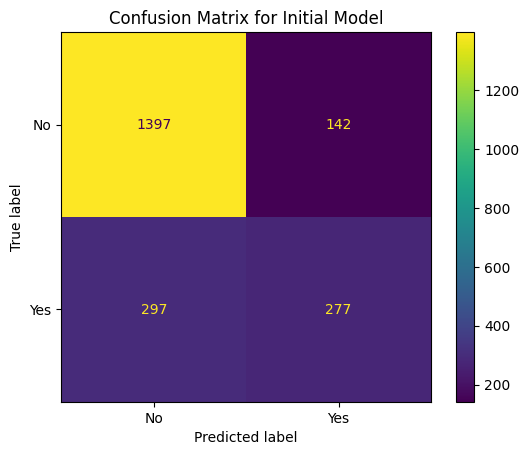

In [33]:
# Vorhersagen und Evaluierung des initialen Modells
y_pred_initial = pipe.predict(X_test)

# Genauigkeit des Modells
print("Accuracy of initial model:", accuracy_score(y_test, y_pred_initial))

# Klassifikationsbericht
print("Classification report of initial model:")
print(classification_report(y_test, y_pred_initial, target_names=["No", "Yes"]))

# Konfusionsmatrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_initial, display_labels=["No", "Yes"])
plt.title("Confusion Matrix for Initial Model")
plt.show()

Mit einer Genauigkeit von 79,22% haben wir bei diesem Modell ein etwas besseres Ergebnis.

## 5.3.3 Hyperparameter-Tuning

In [34]:
# Hyperparameter
# besten Parameterkombinationen finden, um die Modellleistung zu maximieren und Überanpassung zu vermeiden
params = {
    'classifier__n_estimators': [10, 50, 100], # Anzahl der Bäume: 10 leichter zu trainieren (ungenauer), aber 100 genauere Vorhersagen (dauert länger)
    'classifier__max_depth': [None, 10, 20], # maximale Tiefe der Bäume: Begrenzung schützt vor Overfitting
    'classifier__min_samples_split': [2, 10], # minimale Anzahl von Samples, die erforderlich ist, um einen Knoten zu teilen (höhere kann Overfitting vermeiden)
    'classifier__min_samples_leaf': [1, 5], # minimale Anzahl von Samples eines Blattknoten
}

# GridSearchCV für Hyperparameter-Tuning
# beste Kombination von Hyperparametern für Modell
grid_search = GridSearchCV(pipe, params, cv=10, scoring="accuracy", n_jobs=-1, verbose=1, return_train_score=True)
grid_search.fit(X_train, y_train)

# Beste Parameter
print("Best parameters:", grid_search.best_params_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}


## 6.2 Evaluierung des besten Modells

Accuracy: 0.8012304779933743
              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1539
         Yes       0.68      0.51      0.58       574

    accuracy                           0.80      2113
   macro avg       0.76      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



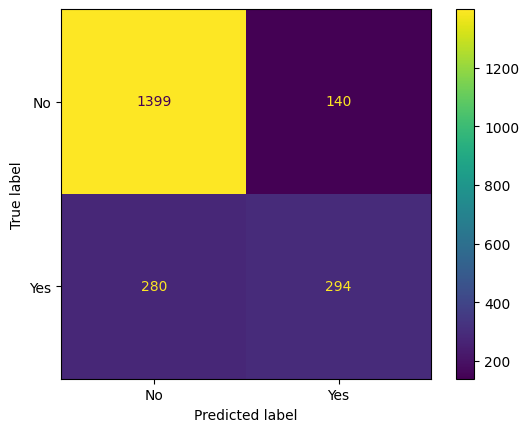

In [35]:
# Modell mit den besten Parametern
best_rf_model = grid_search.best_estimator_

# Vorhersagen und Evaluierung des Modells
y_pred = best_rf_model.predict(X_test)

# Genauigkeit des Modells
print("Accuracy:", accuracy_score(y_test, y_pred))

# Klassifikationsbericht
print(classification_report(y_test, y_pred, target_names=["No", "Yes"]))

# Konfusionsmatrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["No", "Yes"])

## Konfusionsmatrix:

- True Negatives (No, No): 1399 richtig vorhergesagte Nicht-Abwanderung
- False Positives (No, Yes): 140 falsch vorhergesagte Abwanderung
- False Negatives (Yes, No): 280 falsch vorhergesagte Nicht-Abwanderung
- True Positives (Yes, Yes): 294 richtig vorhergesagte Abwanderung

Auch hier ist das Modell mit TN 1399 gut darin Kunden zu erkennen, die nicht abwandern. Ebenfalls werden bei TP 294 Abwanderungen von Kunden erkannt. Problematisch sind wiederum FN und FP.

## Klassifikationsbericht:

Das Modell hat eine Genauigkeit von 80,12% die Kundenabwanderung richtig vorherzusagen. Die Precision (Yes) zeigt, dass 68% als abwandernd vorhergesagten Kunden tatsächtlich abwandern. Ein höherer Wert ist hier immer wünschenswert, da das Unternehmen so weniger Ressourcen an Kunden verschwendet, die sie eigentlich nicht verloren hätten. Außerdem werden bei einem Recall von 51% (Yes) wieder die Hälfte der abwandernden Kunden nicht erkannt.

## Permutation Importance:

Man erkennt, dass vor allem Kunden ohne Online Security den größten Einfluss auf die Kundenabwanderung haben. Auch Kunden mit Angehörigen beeinflussen dies stark. Weitere wichtige Features sind MultipleLines, also Kunden die keinen Telefondienst abonniert haben oder Kunden ohne Online Backup.

## 6.3 Feature Importance

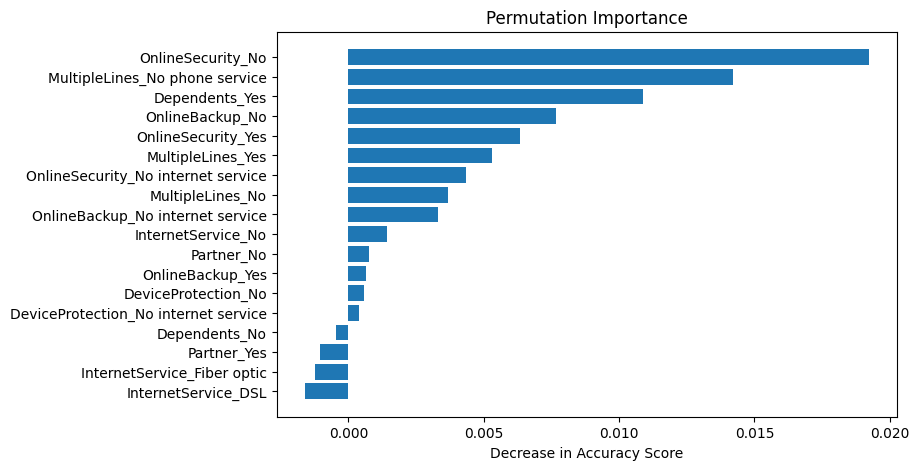

In [36]:
# Feature-Wichtigkeit
perm_importance = permutation_importance(best_rf_model, X_test, y_test, n_repeats=5, random_state=42)
features_names = best_rf_model.named_steps["preprocessor"].transformers_[1][1].get_feature_names_out()
importances = perm_importance["importances_mean"]
sorted_idx = importances.argsort()

plt.figure(figsize=(8, 5))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(features_names)[sorted_idx])
plt.xlabel("Decrease in Accuracy Score")
plt.title("Permutation Importance")
plt.show()

Negativen Features entfernen, da sie keinen positiven Beitrag zur Leistung des Modells beitragen. Nach Durchführung von diesem Schritt hat sich das Modell nur sehr geringfügig verbessert.

## Fazit:

Der Random Forest identifiziert viele Kunden korrekt, die im Unternehmen bleiben und die abwandern. Ein Hauptproblem bleibt die Erkennung der abwandernden Kunden, die nicht identifiziert werden.

## 6.4 Schwellenwertanpassung & visuelle Darstellungen

Accuracy with adjusted threshold: 0.7709417889256981
              precision    recall  f1-score   support

          No       0.91      0.76      0.83      1539
         Yes       0.56      0.79      0.65       574

    accuracy                           0.77      2113
   macro avg       0.73      0.78      0.74      2113
weighted avg       0.81      0.77      0.78      2113



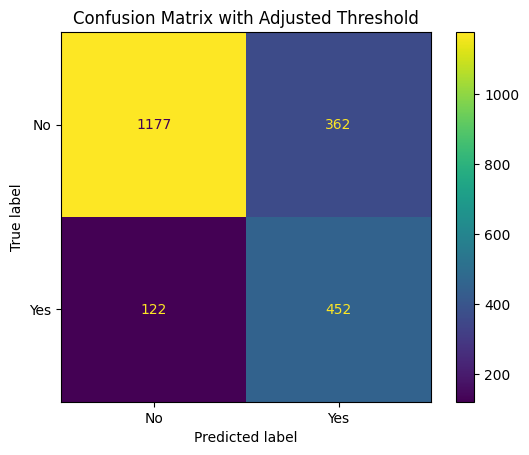

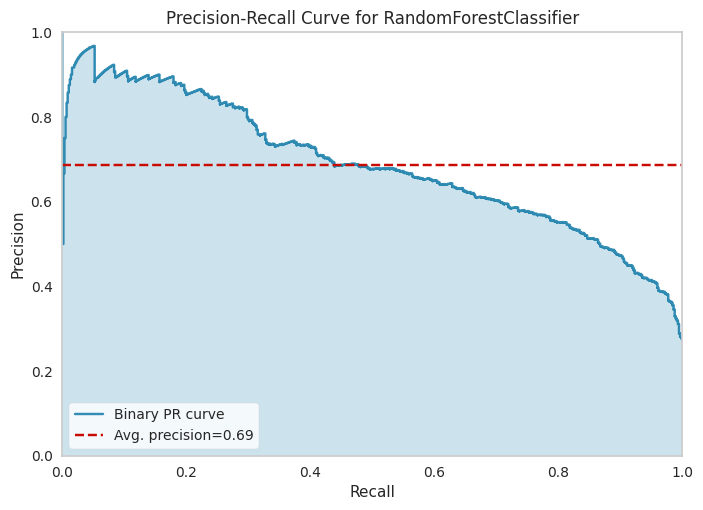

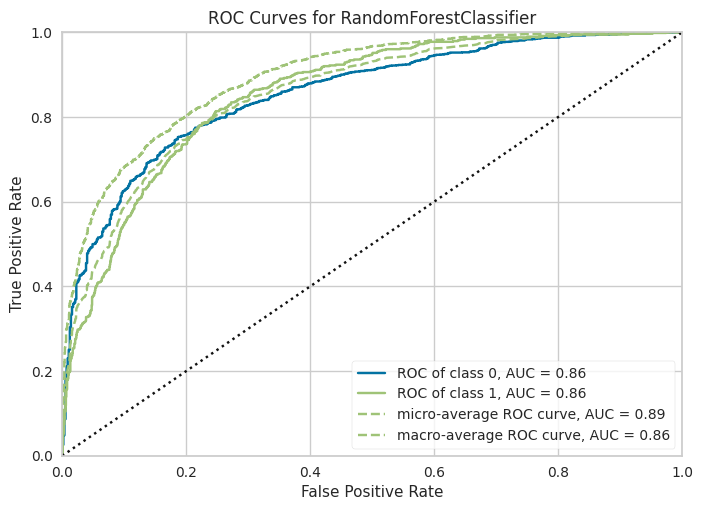

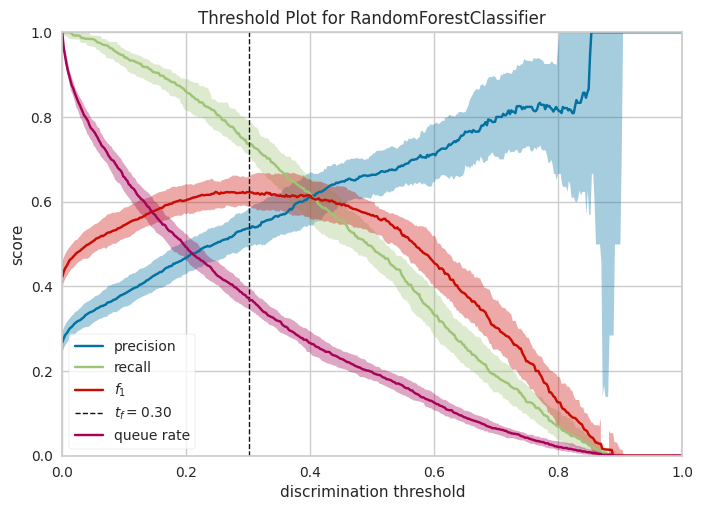

<Axes: title={'center': 'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [37]:
# Schwellenwertanpassung
# Vorhersagewahrscheinlichkeiten für das beste Modell
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]

# Anpassung des Schwellenwerts
threshold = 0.3  # Schwellenwert
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Evaluierung des angepassten Modells
print("Accuracy with adjusted threshold:", accuracy_score(y_test, y_pred_adjusted))
print(classification_report(y_test, y_pred_adjusted, target_names=["No", "Yes"]))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_adjusted, display_labels=["No", "Yes"])
plt.title("Confusion Matrix with Adjusted Threshold")
plt.show()

# Beziehung zwischen Precision und Recall bei verschiedenen Schwellenwerten
# Nützlich bei unausgewogenen Datensätzen
# Korrekte Identifizierung positiver Fälle (Recall) und wie Präzise Vorhersage (Precision)
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(best_rf_model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

# TPR gegen FPR aufgetragen bei verschiedenen Schwellenwerten
# wie gut Modell zwischen Klassen unterscheidet
from yellowbrick.classifier import ROCAUC
viz = ROCAUC(best_rf_model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

# Annahme: best_rf_model ist das beste Modell aus dem GridSearchCV
from yellowbrick.classifier import DiscriminationThreshold
viz = DiscriminationThreshold(best_rf_model)
viz.fit(X_train, y_train)
viz.show()

## Konfusionsmatrix mit angepasstem Schwellenwert:

- True Negatives (No, No): 1177 richtig vorhergesagte Nicht-Abwanderung
- False Positives (No, Yes): 362 falsch vorhergesagte Abwanderung
- False Negatives (Yes, No): 122 falsch vorhergesagte Nicht-Abwanderung
- True Positives (Yes, Yes): 452 richtig vorhergesagte Abwanderung

Die Genauigkeit des Modells hat nach der Schwellenwertanpassung abgenommen auf 77,09% (vorher 80,12%). Dies ist ein Kompromiss, den man eingeht, um andere Werte zu verbessern. Insbesondere der Recall (Yes) hat sich von 51% auf 79% verbessert. Das Modell ist also in der Lage einen größeren Teil der tatsächlichen Kundenabwanderungen richtig zu erkennen. Auch die TP hat sich von 294 auf 452 verbessert, was dafür sorgt, dass mehr abgewanderte Kunden identifiziert werden. Die reduzierung von FN von 280 auf 122 ist ebenfalls zu begrüßen, da das Modell nun weniger Abwanderungen übersieht. Dies gibt dem Unternehmen die Möglichkeit rechtzeitig Maßnahmen einzuleiten. Precision (Yes) ist von 68% auf 56% gesunken, was dafür sorgt, dass mehr Kunden fälschlicherweise als abwandernd klassifiziert werde. Dies zeigt ebenfalls die Verschlechterung bei FP von 140 auf 362.

Das Erkennen der tatsächlichen Abwanderungen hat sich durch die Schwellenwertanpassung verbessert. Im Kontext der Kundenabwanderung scheinen die Verschlechterungen ein guter Kompromiss, um den Recall zu erhöhen und somit viele Kundenabwanderungen rechtzeitig zu erkennen.

## 6.5 Vergleich beider Modelle

Zur besseren Vergleichbarkeit wird das Random Forest Modell vor der Schwellenwertanpassung mit Decision Tree verglichen. 

Das Random Forest Modell hat mit 80,12% eine höhere Genauigkeit als Decision Tree mit 77,66%. Das Modell ist also insgesamt zuverlässiger. Außerdem erkennt Random Forest mehr tatsächlich abwandernde Kunden, was wichtig ist, um präventive Maßnahmen gegen die Abwanderung zu ergreifen. Die geringere Anzahl von Random Forest bei FP sorgt dafür, dass Ressourcen bei der Kundenbindung eingespart werden können, da man hier weniger Kunden fälschlicherweise als abwandernd klassifiziert. Auch bei der Presicion (Yes) ist Random Forest besser und sorgt für weniger falsche Vorhersagen bei der Abwanderung. Beide Modelle haben einen ähnlichen Recall (Yes) Wert. Sie sind also beide ungefähr gleich gut Kundenabwanderung zu identifizieren.

Das Random Forest Modell kann also als das leistungsstärkere Modell angesehen werden und ist besser geeignet für die Vorhersage von Kundenabwanderung.

# 7 Possible Business Use

Beide Modelle helfen dem Unternehmen die Abwanderungen von Kunden vorherzusagen. Durch die frühzeitige Identifikation von abwandernden Kunden können geeignete Maßnahmen ergriffen werden, um die Kundenbindung zu stärken. Durch eine Reduzierung der falschen Vorhersagen von Abwanderungen kann das Unternehmen ebenfalls Ressourcen sparen. Hierbei scheint das Random Forest Modell besonders gut geeignet. Es erkennt mehr richtgie Kundenabwanderungen und macht weniger falsche Vorhersagen bei fälchlicherweise abwandernden Kunden. Insgesamt wird also damit der Kundenabwanderung entgegengewirkt, was vor allem zu einer Steigerung des Umsatzes führt. Dies kann weiterhin für einen Wettbewerbsvorteil sorgen, da durch das frühzeitige erkennen von Abwanderungen geeignete Modelle für Kunden entwickelt werden können, um diese als Kunden weiterhin zu behalten.